# Datasplit

In [60]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%autoreload 
import pandas as pd
import numpy as np
from argparse import ArgumentParser
from pkg.wsi_mil.deepmil.aide_csv_maker import test_stratif
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
import pandas as pd

In [62]:
tile_folder = "/Users/aliceblondel/Desktop/WSI_vesper/data/Embeddings/Ctranspath/tiles/"  

df = pd.read_excel("/Users/aliceblondel/Desktop/WSI_vesper/data/2023-05-09 Cas VESPER avec annotation QuPath.xlsx")
contour_df = pd.read_excel("/Users/aliceblondel/Desktop/WSI_vesper/data/Selected_Contour_annotation.xlsx")

new_df = df[df["ID_VESPER"].isin(contour_df["zone_id"].unique())]
new_df = new_df.rename(columns={"ID_VESPER": "ID", "Consensus classification": "output_variable", "ID patient": "patient_id"})
# new_df = new_df[~new_df["target"].isin(['NE.like', 'LumNS'])]
new_df = new_df.reset_index(drop=True)


In [63]:
target_name = "output_variable"
group_by = "patient_id"
equ_vars = None
k=3

table = test_stratif(
    new_df, 
    equ_vars, 
    target_name,
    group_by, 
    k,
)
table.to_csv("split_test_3.csv", index=False)


## Stats

In [64]:
import matplotlib.pyplot as plt

def plot_fold_statistics(df, k,target_name):
    """
    Plot statistics, including the total number of rows, 
    class proportions in training, and class proportions in validation.
    """
    plt.figure(figsize=(4*k, 4))

    for j in range(k):
        val_df = df[df['test']==j].reset_index(drop=True)

        plt.subplot(1, k, j+1)
        class_proportions = val_df[target_name].value_counts()
        print(class_proportions)
        classes = class_proportions.index
        plt.bar(classes, class_proportions)
        plt.title(f'Class Proportions : T{j}')
    
    plt.tight_layout()  
    plt.show()


Ba.Sq          48
LumU           31
Stroma.rich    30
LumP           19
LumNS           7
NE.like         1
Name: output_variable, dtype: int64
Ba.Sq          48
LumU           30
Stroma.rich    30
LumP           19
LumNS           8
NE.like         1
Name: output_variable, dtype: int64
Ba.Sq          48
LumU           30
Stroma.rich    29
LumP           19
LumNS           8
NE.like         2
Name: output_variable, dtype: int64


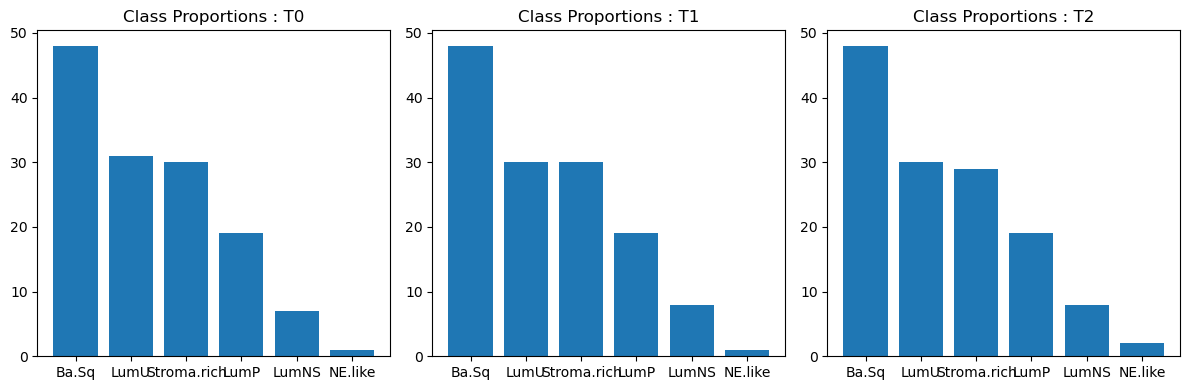

In [66]:
plot_fold_statistics(table, k,target_name)

In [67]:
def check_overlap(df, k, group_by):
    dfs = [df[df['test']==j].reset_index(drop=True) for j in range(k)]
    for i in range(len(dfs)):
        for j in range(i + 1, len(dfs)):
            overlap = pd.merge(dfs[i], dfs[j], on='patient_id', how='inner')
            
            if not overlap.empty:
                print(f"/!\ There is an overlap between df{i+1} and df{j+1} on the 'patient_id' column.")
            else:
                print(f"No overlap between df{i+1} and df{j+1}.")



In [68]:
check_overlap(table, 4, 'patient_id')

No overlap between df1 and df2.
No overlap between df1 and df3.
No overlap between df1 and df4.
No overlap between df2 and df3.
No overlap between df2 and df4.
No overlap between df3 and df4.


## Stats

In [1]:
import os
import pandas as pd
import numpy as np

tiles_path = "/Users/aliceblondel/Desktop/wsi_mil_upstream/data/Embeddings/Ctranspath_PCA/tiles"
df = pd.read_csv("/Users/aliceblondel/Desktop/WSI_vesper/data/split_test_4.csv")

In [2]:
df

,Run,patient_id,ID,Prélèvement,Envoi plateforme ARN,Date d'envoi ARN,dV200,Extractions faites ?,3'RNAseq trouble,output_variable,Separation level,topWeightedClass,Subtype diversity,Histological type,Zone annotée ?,Unnamed: 15,Unnamed: 16,stratif,test
0,D243,2,VB002_z1,RTUV,Oui,2019-11-18,53,NaN,NaN,Ba.Sq,0.743915,Ba.Sq,0.489881,epidermoid,Non,Je n'arrive pas à bien distinguer les zones su...,NaN,Ba.Sq_,1.0
1,D243,2,VB002_z2,RTUV,Oui,2019-11-18,32,NaN,NaN,Ba.Sq,0.759953,Ba.Sq,0.845784,sarcomatoid,Non,Je n'arrive pas à bien distinguer les zones su...,NaN,Ba.Sq_,1.0
2,D670,4,VB004,RTUV,Oui,2021-04-19,22.2,NaN,NaN,Ba.Sq,0.371169,Ba.Sq,0.972778,conventional,Oui,NaN,NaN,Ba.Sq_,1.0
3,D243,5,VB005_z1,RTUV,Oui,2019-11-18,21,NaN,NaN,LumU,0.488373,LumU,1.328375,conventional,Oui,NaN,NaN,LumU_,2.0
4,D611,6,VB006_z1,RTUV,Oui,2021-02-09,36.9,NaN,NaN,Ba.Sq,0.587415,0,0.000000,sarcomatoid,Oui,NaN,NaN,Ba.Sq_,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,D611,518,VB518_z1,RTUV,Oui,2021-02-09,11.8,NaN,NaN,Ba.Sq,0.711906,Ba.Sq,0.000000,epidermoid,Oui,NaN,NaN,Ba.Sq_,0.0
404,D611,518,VB518_z2,RTUV,Oui,2021-02-09,52,NaN,NaN,LumU,0.459445,LumU,0.982604,giant cell,Oui,NaN,NaN,LumU_,0.0
405,D630,519,VB519_z1,RTUV,Oui,2021-03-09,51.5,NaN,NaN,LumU,0.715866,LumU,1.488323,glandular,Oui,NaN,NaN,LumU_,1.0
406,D630,519,VB519_z2,RTUV,Oui,2021-03-09,49,NaN,NaN,Ba.Sq,0.061991,LumP,1.567998,conventional,Oui,NaN,NaN,Ba.Sq_,1.0


In [21]:
d = {'Ba.Sq':[], 'LumU':[], 'Stroma.rich':[], 'NE.like':[], 'LumP':[], 'LumNS':[],}

for file in os.listdir(tiles_path):
    zone_id = file.split(".npy")[0]
    target = df[df["ID"]==zone_id]["output_variable"].iloc[0]

    patient = df[df["ID"]==zone_id]["patient_id"].iloc[0]

    path = os.path.join(tiles_path, file)
    emb = np.load(path)
    n_tiles = emb.shape[0]

    d[target].append(n_tiles)
    d[target].append(patient)


In [22]:
for c, cards in d.items():
    print(c)
    print(cards)
    print(c, ":", np.min(cards))

Ba.Sq
[373, 111, 1256, 247, 967, 265, 226, 263, 241, 488, 1325, 463, 526, 111, 797, 267, 351, 479, 425, 56, 171, 263, 160, 486, 861, 421, 469, 357, 292, 70, 257, 262, 731, 292, 504, 370, 812, 129, 393, 471, 560, 357, 303, 518, 290, 70, 477, 374, 180, 459, 566, 29, 395, 300, 747, 314, 1190, 194, 320, 379, 322, 9, 246, 473, 362, 4, 527, 174, 895, 399, 499, 461, 662, 366, 517, 172, 322, 12, 221, 9, 472, 473, 499, 461, 598, 222, 360, 403, 541, 294, 1193, 177, 1458, 17, 427, 490, 706, 294, 143, 202, 708, 122, 514, 64, 510, 388, 194, 490, 215, 352, 778, 317, 511, 385, 516, 362, 504, 193, 620, 187, 492, 232, 419, 313, 307, 442, 373, 481, 110, 472, 139, 405, 216, 2, 792, 499, 1029, 317, 597, 362, 149, 157, 271, 102, 773, 27, 473, 313, 410, 442, 946, 474, 795, 382, 92, 2, 235, 102, 536, 378, 746, 422, 151, 311, 416, 198, 116, 472, 806, 346, 177, 472, 191, 239, 838, 207, 131, 311, 110, 440, 684, 299, 247, 519, 72, 472, 302, 34, 312, 239, 215, 415, 209, 480, 300, 323, 579, 75, 578, 47, 479, 279, 

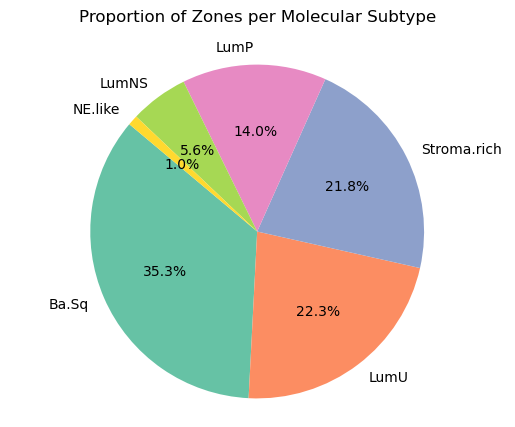

In [71]:
import matplotlib.pyplot as plt

# Data
labels = ['Ba.Sq', 'LumU', 'Stroma.rich', 'LumP', 'LumNS', 'NE.like']
# sizes = [68768, 46585, 35513, 27858, 11091, 2366]
sizes = [144, 91, 89, 57, 23, 4]

# Define neutral colors
neutral_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=neutral_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Proportion of Zones per Molecular Subtype\n')

# Display the chart
plt.show()
